# Project 3: Optical Character Recognition

As a protoypical image analysis and categorization task we look at identifying the correct digit (0...9) in digital images of handwritten digits.  For this project we'll use the digits dataset built into sklearn.  In future projects we will use the MNIST data set of handwritten digits which consist of large images (28x28 pixels) and contains more smaples (>50000).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

## a) Describe and visualize the data, for example how many samples, feature and target dimensionality? Visualize some of the digits (<=100).

In [2]:
dig = load_digits()
print("Keys of Digits Dataset: {}".format(dig.keys()))

Keys of Digits Dataset: dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


### Information on Dataset

In [3]:
print("Description of Digits: 8x8 image of integer pixels in the range 0...16.")
print("Target Names: {}".format(dig['target_names']))
print("Data: {}".format(dig['data']))
print("Target: {}".format(dig['target']))
print("Images: {}".format(dig['images']))

Description of Digits: 8x8 image of integer pixels in the range 0...16.
Target Names: [0 1 2 3 4 5 6 7 8 9]
Data: [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
Target: [0 1 2 ... 8 9 8]
Images: [[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.

### Shape of Data

Shape of data: (1797, 64)
Shape of target: (1797,)


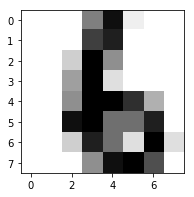

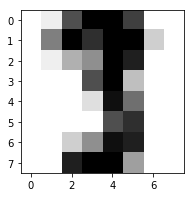

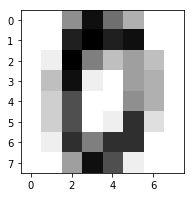

In [4]:
print("Shape of data: {}".format(dig.data.shape))
print("Shape of target: {}".format(dig.target.shape))
plt.figure(1, figsize=(3,3))
plt.imshow(dig.images[16], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
plt.figure(1, figsize=(3,3))
plt.imshow(dig.images[1624], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
plt.figure(1, figsize=(3,3))
plt.imshow(dig.images[335], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

## b) How useful is it to graph the dependency of the target on each feature or a pair of features as we have done in previous projects?  Read in the textbook and in the sklearn documentation about dimensionality reduction using Principal Component Analysis (PCA) and Manifold Learning.  Apply one example each of PCA and Manifold Learning to the digits data set.  Keep two dimensions.

It is not useful to graph the dependency of the features to the target because the features are just the darkness values of each pixel, so plotting the value of a pixel to the target (an integer drawn in the picture) would not show any sort of dependency.

### PCA
https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
http://scikit-learn.org/stable/modules/decomposition.html

In [5]:
from sklearn.decomposition import PCA
pca = PCA(2)
projected = pca.fit_transform(dig.data)
print(dig.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


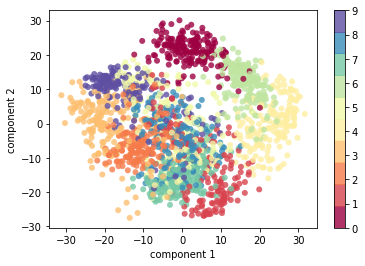

In [6]:
plt.scatter(projected[:,0], projected[:,1], c=dig.target, edgecolor="none", alpha = 0.8, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Number of components to describe 50% of the variance in the data: 5


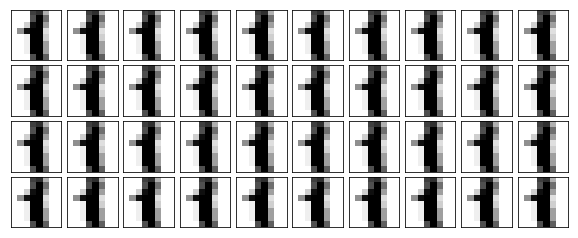

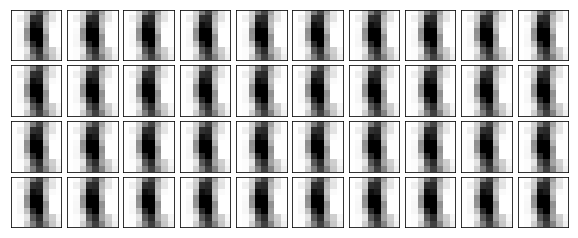

In [7]:
pca = PCA(0.50).fit(dig.data)
print("Number of components to describe 50% of the variance in the data: {}".format(pca.n_components_))
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[1].reshape(8,8), cmap='binary', interpolation='nearest', clim=(0,16))
plot_digits(dig.data)
components = pca.transform(dig.data)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

### Manifold Learning
https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html
http://scikit-learn.org/stable/modules/manifold.html

Multidimensional Scaling (MDS)

Shape of projection: (1797, 2)


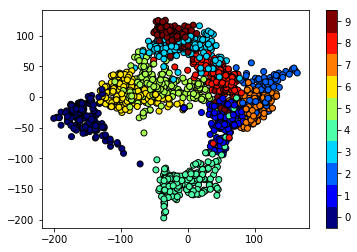

In [11]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(dig.data)
print("Shape of projection: {}".format(proj.shape))
plt.scatter(proj[:, 0], proj[:, 1], c=dig.target, cmap=plt.cm.get_cmap('jet', 10), edgecolors='k')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

## c) Supervised Learning.  Apply one of the methods we have looked at so far (SVM, Decision Trees, Random Forests) to the digits problem.  Use model validaiton and parameter searches as needed.  How accurate is your model?  Use appropriate measures to describe the accuracy of your model.

I will be using SVM to the digits dataset. The example I am following is from https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

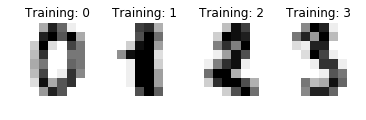

In [12]:
from sklearn import svm, metrics
images_and_labels = list(zip(dig.images, dig.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.47      0.64        40
          1       1.00      0.43      0.61        53
          2       1.00      0.34      0.51        44
          3       1.00      0.27      0.42        52
          4       0.11      1.00      0.21        34
          5       1.00      0.79      0.88        43
          6       1.00      0.74      0.85        35
          7       1.00      0.28      0.43        47
          8       1.00      0.04      0.08        51
          9       1.00      0.14      0.24        51

avg / total       0.93      0.42      0.47       450


Confusion matrix:
[[19  0  0  0 21  0  0  0  0  0]
 [ 0 23  0  0 30  0  0  0  0  0]
 [ 0  0 15  0

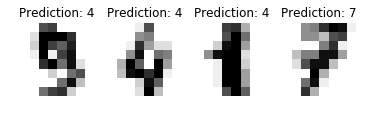

In [18]:
n_samples = len(dig.images)
data = dig.images.reshape((n_samples, -1))
SVC = svm.SVC()
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, dig['target'])
SVC.fit(X_train, y_train)
#predict
y_pred = SVC.predict(X_test)
print("Classification report for classifier %s:\n%s\n" % (SVC, metrics.classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

images_and_predictions = list(zip(dig.images[y_test], y_pred))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
plt.show()

Using GridSearchCV to find best value for gamma

In [24]:
from sklearn.model_selection import GridSearchCV
parameters = {'gamma':[0.001, 0.0015, 0.00095]}
CV = GridSearchCV(SVC, parameters, cv=5)
CV.fit(dig.data, dig.target)
print("Best parameter found: {}".format(CV.best_params_))
print("Means: {}".format(CV.cv_results_['mean_test_score']))
print("Standard Deviation: {}".format(CV.cv_results_['std_test_score']))

Best parameter found: {'gamma': 0.001}
Means: [0.97161937 0.96994992 0.97161937]
Standard Deviation: [0.01545875 0.01541882 0.01545875]


Comparison of original output and output with tuned parameters

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
print("Original Output: \n")
print("Classification report for classifier %s:\n%s\n" % (SVC, metrics.classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))
print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_pred)))
print("Variance Score: {}".format(r2_score(y_test, y_pred)))
images_and_predictions = list(zip(dig.images[y_test], y_pred))
SVC2 = svm.SVC(gamma=0.001)
SVC2.fit(X_train, y_train)
y_pred2 = SVC2.predict(X_test)
print("Tuned Output: \n")
print("Classification report for classifier %s:\n%s\n" % (SVC, metrics.classification_report(y_test, y_pred2)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred2))
print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_pred2)))
print("Variance Score: {}".format(r2_score(y_test, y_pred2)))

Original Output: 

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.47      0.64        40
          1       1.00      0.43      0.61        53
          2       1.00      0.34      0.51        44
          3       1.00      0.27      0.42        52
          4       0.11      1.00      0.21        34
          5       1.00      0.79      0.88        43
          6       1.00      0.74      0.85        35
          7       1.00      0.28      0.43        47
          8       1.00      0.04      0.08        51
          9       1.00      0.14      0.24        51

avg / total       0.93      0.42      0.47       450


Confusion matrix:
[[19  0  0  0 21  0  0  0  0  0]
 [ 0 23  0  0 30  0  0  0  

Comparison of image predictions for untuned and tuned gamma

Untuned


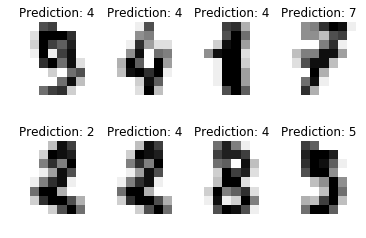

Tuned


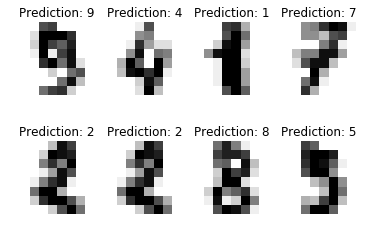

In [43]:
images_and_predictions = list(zip(dig.images[y_test], y_pred))
print("Untuned")
for index, (image, prediction) in enumerate(images_and_predictions[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction);
plt.show()
images_and_predictions = list(zip(dig.images[y_test], y_pred2))
print("Tuned")
for index, (image, prediction) in enumerate(images_and_predictions[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
plt.show()

## d) (optional) Exploration: Unsupervised Learning. In supervised learning we use labelled data to train or build a model.  In the case of the images of handwritted digits, each image is labelled with the correct digit (0...9).  Unsupervised learning tries to extract the fact that there are ten different objects from the images without knowing the labels.  Apply k-means clustering techniques to the digits problem.

### K-means Clustering
https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html